# Data Analysis and Machine Learning Algorithms  on Customer Churn Data 

## This dataset holds around 7k records. I am using this dataset to predict the customer churn for an product, I am trying different machine learning algorithms and checking the accuracy score for each model and selecting optimized one.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=  pd.read_csv("customer_churn_data.csv")

In [5]:
# Assessing the data

data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Manipulation

In [11]:
# a) Extract the column Dependent from the dataset and store it in a variable named 'customer_5'

customer_5 = data.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [18]:
# b) Extracting all the data based on condition (gender = Male, SeniorCitizen = Yes and PaymentMethod = 'Electronic check')
senior_male_electronic = data.query("gender=='Male' and SeniorCitizen== 1 and PaymentMethod == 'Electronic check'")
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [19]:
senior_male_electronic.shape

(298, 21)

In [24]:
#c) Extracting the data whose tenure is greater than 70 or monthly charges is greater than 100$ , store the result in 'customer_total_tenure'

customer_total_tenure = data.query("tenure > 70 or MonthlyCharges > 100")
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [25]:
customer_total_tenure.shape

(1259, 21)

In [28]:
# d) Extract all customers whose contract is of 2 years, payment method is Mailed Check and the value of churn is Yes, store the result in the "two_mail_yes"

two_mail_yes = data[(data["Contract"] == "Two year") & (data["PaymentMethod"] == "Mailed check") & (data["Churn"] == "Yes")]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [29]:
two_mail_yes.shape

(3, 21)

In [31]:
# e) Extracting n number of sample records from the dataset

customer_333 = data.sample(333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1926,6651-AZVTJ,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,4872.45,Yes
3648,9419-IPPBE,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Electronic check,90.15,4554.85,No
2654,2725-KXXWT,Male,0,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.75,90.75,Yes
4095,0641-EVBOJ,Male,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,82.30,214.4,No
219,6496-JDSSB,Female,0,No,No,8,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),80.00,624.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6516,6876-ADESB,Male,0,No,Yes,1,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,48.95,48.95,Yes
4874,1193-RTSLK,Female,0,No,No,38,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.90,3233.6,Yes
5803,4143-OOBWZ,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,81.30,416.3,Yes
801,1450-GALXR,Female,0,No,No,10,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,1058.25,Yes


In [27]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [44]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

## Data Visualization

In [42]:
%matplotlib inline
x= data.InternetService.value_counts().keys().tolist()
y = data.InternetService.value_counts().tolist()

Text(0.5, 1.0, 'Distribution of Internet Service')

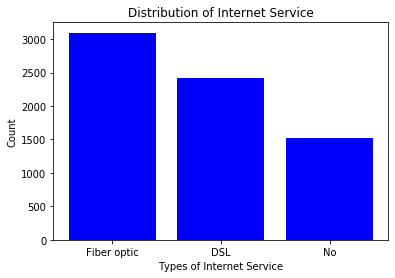

In [47]:
plt.bar(x,y,color="blue")
plt.xlabel("Types of Internet Service")
plt.ylabel("Count")
plt.title("Distribution of Internet Service")

Text(0.5, 1.0, 'Distribution of tenure')

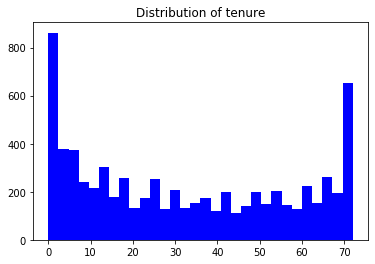

In [48]:
plt.hist(data["tenure"],color="blue",bins=30)
plt.title("Distribution of tenure")

### Linear Regression

In [51]:
# a) Building simple linear model using "Tenure" as independent variable and "Monthly charge" as dependent variable
# b) Divide the dataset into train and test sets in 70:30 ratio
# c) Build the model on train set and predict values on test set
# d) After prediction find the root mean square error

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [55]:
x=data.loc[:,["tenure"]].values
y=data.loc[:,["MonthlyCharges"]].values

In [56]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [58]:
from sklearn.linear_model import LinearRegression
simplelinearreg = LinearRegression()
simplelinearreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# Predicted Values
y_pred = simplelinearreg.predict(x_test)
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [62]:
# Actual Values
y_test

array([[ 58.2 ],
       [116.6 ],
       [ 71.95],
       ...,
       [109.95],
       [ 24.55],
       [ 81.6 ]])

In [63]:
# root mean square

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

Here the rmse value is very high so this model is not fit for predicting the monthly charges

### Logistic Regression

In [ ]:
# a) Building logistic model using "churn" as dependent variable and "Monthly charge" as independent variable
# b) Divide the dataset into train and test sets in 65:35 ratio
# c) Build the model on train set and predict values on test set
# d) After prediction find the root mean square error

In [64]:
x=data.loc[:,["MonthlyCharges"]].values
y=data.loc[:,["Churn"]].values

In [65]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [67]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

F:\Job\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [70]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[1815  651]
 [   0    0]]
0.7360097323600974


### Multiple Logistic Regression

In [ ]:
# a) Building multiple logistic model using "churn" as dependent variable and "Monthly charge and tenure" as independent variable
# b) Divide the dataset into train and test sets in 80:20 ratio
# c) Build the model on train set and predict values on test set
# d) After prediction find the confusion matrix and accuracy score

In [75]:
x=data.loc[:,["MonthlyCharges","tenure"]].values
y=data.loc[:,["Churn"]].values

In [76]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [77]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

F:\Job\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [79]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[934 212]
 [107 156]]
0.7735982966643009


### Decision Tree

In [ ]:
# a) Building multiple logistic model using "churn" as dependent variable and "tenure" as independent variable
# b) Divide the dataset into train and test sets in 80:20 ratio
# c) Build the model on train set and predict values on test set
# d) After prediction find the confusion matrix and accuracy score

In [81]:
x=data.loc[:,["tenure"]].values
y=data.loc[:,["Churn"]].values

In [82]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [83]:
from sklearn.tree import DecisionTreeClassifier
Dectree = DecisionTreeClassifier()
Dectree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
y_pred = Dectree.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [87]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[965 281]
 [ 76  87]]
0.7466288147622427


### Random Forest

In [91]:
# a) Building multiple logistic model using "churn" as dependent variable and "Monthly charge and tenure" as independent variable
# b) Divide the dataset into train and test sets in 80:20 ratio
# c) Build the model on train set and predict values on test set
# d) After prediction find the confusion matrix and accuracy score

In [92]:
x=data.loc[:,["MonthlyCharges","tenure"]].values
y=data.loc[:,["Churn"]].values

In [94]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [100]:
from sklearn.ensemble import RandomForestClassifier
RandomForestCl = RandomForestClassifier(n_estimators=200)
RandomForestCl.fit(X_train,Y_train)

F:\Job\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
y_pred = RandomForestCl.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [102]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[1349  326]
 [ 211  227]]
0.7458589682915286


### Conclusion

It is evident from the accuracy scores that Multiple Logistic regression is best fit for to predict the customer churn while compared to other machine learning models.